# Com eliminar el soroll de videos amb aquest programa

El fitxer ica.py conté les classes que abstrauen i faciliten el processament de videos,
tant amb un jupyter notebook com amb un altre script de python.
També trobem denoise-video.py, un script que podem utilitzar directament des de la línia
de comandos per processar un video fàcilment, amb alguns paràmatres modificables,
de la manera que està pensat fer-ho.

## ica.py

El programa conté molta documentació explicant cada funció i classe.
La manera de usar-la més simple i típica es troba en la funció `main()`:


Applying the spatial gaussian mean filter to each frame.
Applying PCA
PCA shape (1000, 1000)
Finished PCA, 1000 components extracted.


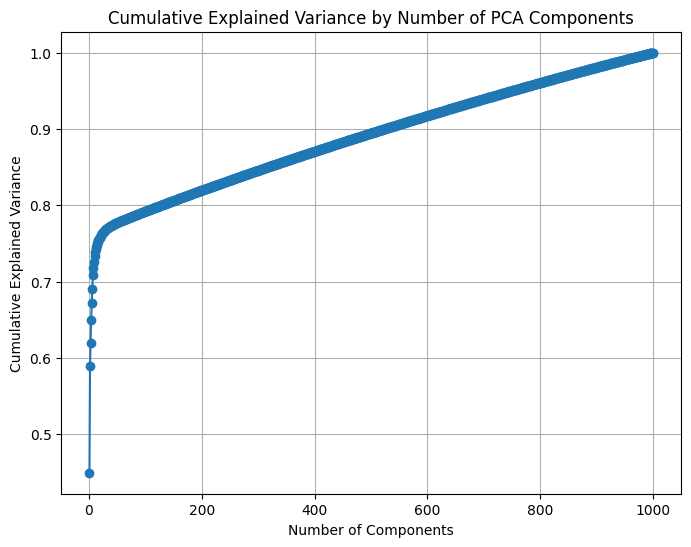

In [1]:
from ica import AutoSelector, GaussianSpatialFilter, VideoAnalyzer, VideoData

video_path = "/Users/annateruel/Desktop/2.avi"
output_path = "/Users/annateruel/Desktop/out.avi"

# Initialize VideoProcessor with preprocessors and analysis methods
video = VideoData(
    video_path,
)

# Load video
video.load_video()

analyzer = VideoAnalyzer(video, [GaussianSpatialFilter(1.5)])

# Choose how many components to use
analyzer.choose_n_pca_components_interactive()

# Decompose video
analyzer.decompose_video()

# Select ICA components
is_component_selected = AutoSelector().select_components(
    analyzer.get_component_maps()
)

# Depends on ffmpeg installed on the system
# If not installed, use save_frames_as_mp4
video.save_frames_lossless(
    analyzer.compose_video(is_component_selected=is_component_selected), output_path
)
# video.save_frames_as_mp4(
#     analyzer.compose_video(is_component_selected=is_component_selected), output_path
# )

non_selected_components = [not selected for selected in is_component_selected]
# Depends on ffmpeg installed on the system
# If not installed, use save_frames_as_mp4
video.save_frames_lossless(
    analyzer.compose_video(is_component_selected=non_selected_components),
    f"non_selected_{output_path}",
)
# video.save_frames_as_mp4(
#     analyzer.compose_video(is_component_selected=non_selected_components),
#     f"non_selected_{output_path}",
# )

## denoise-video.py

Aquest script el podem cridar desde la línia de comandos amb:
`python denoise-video.py 0.avi`
on en lloc de 0.avi poses el nom del video que vols netejar.

Podem usar `python denoise-video.py -h` per vore la ajuda.

Així, aplicarà el PCA, mostrarà un grafic i al tancar-lo preguntarà quanta variança acumulada
vols mantindre, tenint en compte el agafar la màxima però sense passar-se de 140 components.

En cas que la corva cresca molt poc a poc, es pot modificar el argument `--gaussian-sigma` (o `-s`),
que te un valor estàndar de 1.5, però es pot augmentar per modificar la relació senyal soroll, ja que aquesta
depen del tamany del video entre altres coses i pot tindre altres valors més adequats.

També podem posar l'argument `--output-path` (o `-o`) per modificar el nom del fitxer que trau, que per defecte sera out.mp4.

L'argument `--no-ffmpeg` es pot utilitzar en cas que no tingam ffmpeg instal·lat al sistema, ja que és necessari
per poder guardar el video en format avi sense pèrdua.
Amb aquesta flag, es guardarà en mp4 sense dependencies, però amb pèrdua.

Per últim, si volem guardar el video de les components no seleccionades per comprovar que no ens hem deixat cap
informació important, posem la flag `--save-not-selected-components` (o `-n`).

Així, una cridada completa quedaria.
`python denoise-video.py --gaussian-sigma 1.5 -o denoised.mp4 -n 0.avi`